### Guía 0 - Ejercicio 5

El agua de un lago de zonas templadas puede dividirse en estratos térmicos. Cerca de la superficie el agua es
tibia y liviana (epilimnion) y en el fondo más fría y densa (hipolimnion). Lo mismo sucede en reactores
químicos. Ambas capas están separadas, aproximadamente, por un plano conocido por thermocline, donde la
derivada segunda de la temperatura respecto de la profundidad se hace cero (o la derivada primera tiene su
máximo). A esta profundidad el flujo de calor de la superficie al fondo de la capa se puede calcular con la ley de
Fourier, $$ J=−k dT/dz $$
. Dados los datos de la tabla siguiente, correspondientes a la temperatura del líquido de
un reactor en función de la profundidad y usando el método de splines, realice un ajuste de la temperatura en
función de la profundidad y de su derivada. Encuentre la posición aproximada de la thermocline y calcule el
flujo de calor a través de la interfaz (tome k=0.01 cal(s . cmºC) )


z(m) 0 0.5 1.0 1.5 2.0 2.5 3.0

T (C) 70 68 55 22 13 11 10

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# tiene las herramientas de algebra lineal y otras herramientas
import copy
# Tengo que importarlo, porque python autom'aticamente genera punteros,
# y de esta manera, genero que se salve haicendo una copia.

In [2]:
z, T = np.loadtxt('DATOS_Guia0_Problema6.dat.txt', unpack=True)
# El unpack hace que pueda separarlo en columnas distintas.
n = len(T)

Cuando tengo # en una fila al principio lo toma como un comentario

Ahora recordando la clase de Rubén, donde explicabamos los splines...S

Text(0, 0.5, 'T')

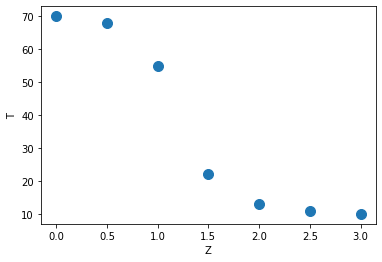

In [3]:
plt.plot(z, T, 'o', ms=10)
# ms es "marker size"', que es el tamaño de los puntitos'
plt.xlabel('Z')
plt.ylabel('T')

* Tengo que generar los vectores h. Los vectores bi van a ser el resultado del calculo de la matriz. 
* El vector de carga es D. Aprovecho a formularlo en uno de los for.

* Tengo n-1 intervalos y n-2 polinomios continuos y dos veces derivable
* los polimeros y las derivadas tienen que valer lo mismo en las intersecciones para las condiciones de contorno que me faltan, impogo que la derivada segunda es cero

In [4]:
H = []
# D = np.zeros([n]) #también podria usar 1,n
D = []
for i in range(n-1):
    # los range nunca incluyen el extremo derecho,
    # entonces el ultimo umero que hace es n-1 si pongo n.
    H.append(z[i+1] - z[i])  # Defino el vector de intervalos

In [5]:
H

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

Defino la matriz

In [6]:
matriz = np.zeros([n, n])

In [7]:
for i in range(1, n-1):
    matriz[i, i-1] = H[i-1]
    matriz[i, i] = 2 * (H[i] + H[i-1])
    matriz[i, i+1] = H[i]

    D.append((T[i+1]-T[i])/H[i]-(T[i]-T[i-1])/H[i-1])
    # D[i] = (T[i+1] - T[i])/H[i] - (T[i] - T[i-1])/H[i-1]

D.insert(0, 0)
D.append(0)
D = np.array(D) * 3

matriz[0, 0] = 1
matriz[n-1, n-1] = 1

In [8]:
matriz

array([[1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 2. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0.5, 2. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0.5, 2. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0.5, 2. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0.5, 2. , 0.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. ]])

Queda como tarea escribir el vector de cargas

In [9]:
D

array([   0.,  -66., -120.,  144.,   42.,    6.,    0.])

Defino el vector b, que será resultante de la matriz y el vector de cargas D

In [10]:
b = np.linalg.solve(matriz, D)

Defino los vectores para resolver los spline

In [11]:
a = []
c = []
d = []

for i in range(len(b)-1):
    a.append((b[i+1] - b[i]) / (3 * H[i]))
    c.append(((T[i+1] - T[i]) / H[i]) - (b[i] * H[i]) - (a[i] * (H[i]**2)))
    d.append(T[i])

Evalúo los vectores que tengo

In [12]:
c

[-1.830769230769231,
 -8.338461538461537,
 -54.815384615384616,
 -48.400000000000006,
 -3.584615384615386,
 -3.261538461538461]

In [13]:
b = b[:len(b) - 1]

In [14]:
P = [np.array(a), b, np.array(c), np.array(d)]

P = np.array(P)
p = np.zeros([len(P[0]), 4])

for j in range(4):
    p[0][j] = P[j][0]
    p[1][j] = P[j][1]
    p[2][j] = P[j][2]
    p[3][j] = P[j][3]
    p[4][j] = P[j][4]
    p[5][j] = P[j][5]

Tengo que centrar los polinomios, para que se genere la continuidad
P(z-z[i])

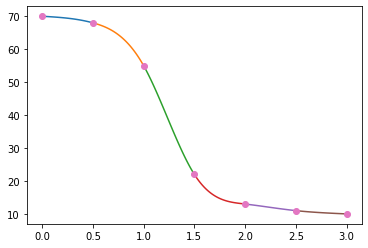

In [15]:
for i in range(len(P[0])):
    x = np.linspace(z[i], z[i+1], 80)
    plt.plot(x, np.polyval(p[i], x - z[i]))
plt.plot(z, T, 'o')

Los polinomios quedaron como

In [16]:
p

array([[ -8.67692308,   0.        ,  -1.83076923,  70.        ],
       [-44.61538462, -13.01538462,  -8.33846154,  68.        ],
       [115.13846154, -79.93846154, -54.81538462,  55.        ],
       [-63.93846154,  92.76923077, -48.4       ,  22.        ],
       [  4.61538462,  -3.13846154,  -3.58461538,  13.        ],
       [ -2.52307692,   3.78461538,  -3.26153846,  11.        ]])

In [17]:
p1 = copy.copy(p[:, :3])

> Por qué se hace el copy de esta manera? 

In [18]:
p1[:, 0] = p1[:, 0] * 3

In [19]:
p1[:, 1] = p1[:, 1] * 2

In [20]:
p1

array([[ -26.03076923,    0.        ,   -1.83076923],
       [-133.84615385,  -26.03076923,   -8.33846154],
       [ 345.41538462, -159.87692308,  -54.81538462],
       [-191.81538462,  185.53846154,  -48.4       ],
       [  13.84615385,   -6.27692308,   -3.58461538],
       [  -7.56923077,    7.56923077,   -3.26153846]])

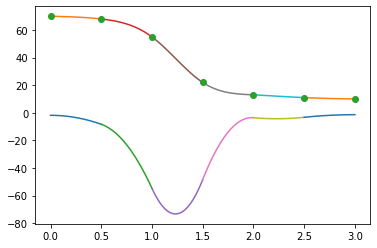

In [21]:
Pol = []
X = []

for i in range(len(P[0])):
    x = np.linspace(z[i], z[i+1], 80)
    pol1 = np.polyval(p1[i], x - z[i])
    plt.plot(x, pol1)
    plt.plot(x, np.polyval(p[i], x - z[i]))
    Pol.append(pol1)
    X.append(x)
plt.plot(z, T, 'o')

(0.0, 80.0)

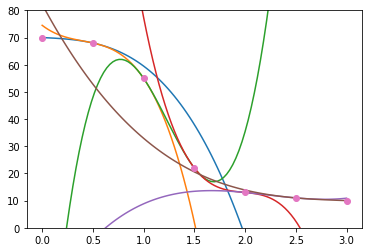

In [22]:
xx = np.linspace(0, 3, 100)
for i in range(len(P[0])):
    pol2 = np.polyval(p[i], xx - z[i])
    plt.plot(xx, pol2)
    # plt.plot(x, np.polyval(p[i], x - z[i]))

plt.plot(z, T, 'o')
plt.ylim(0, 80)

Lo que hace ravel() es concatenar los arrays que estan en el argumento anterior (matriz)

In [23]:
min(np.array(Pol).ravel())

-73.31269397162684

In [24]:
B = np.array(X).ravel()

In [25]:
B

array([0.        , 0.00632911, 0.01265823, 0.01898734, 0.02531646,
       0.03164557, 0.03797468, 0.0443038 , 0.05063291, 0.05696203,
       0.06329114, 0.06962025, 0.07594937, 0.08227848, 0.08860759,
       0.09493671, 0.10126582, 0.10759494, 0.11392405, 0.12025316,
       0.12658228, 0.13291139, 0.13924051, 0.14556962, 0.15189873,
       0.15822785, 0.16455696, 0.17088608, 0.17721519, 0.1835443 ,
       0.18987342, 0.19620253, 0.20253165, 0.20886076, 0.21518987,
       0.22151899, 0.2278481 , 0.23417722, 0.24050633, 0.24683544,
       0.25316456, 0.25949367, 0.26582278, 0.2721519 , 0.27848101,
       0.28481013, 0.29113924, 0.29746835, 0.30379747, 0.31012658,
       0.3164557 , 0.32278481, 0.32911392, 0.33544304, 0.34177215,
       0.34810127, 0.35443038, 0.36075949, 0.36708861, 0.37341772,
       0.37974684, 0.38607595, 0.39240506, 0.39873418, 0.40506329,
       0.41139241, 0.41772152, 0.42405063, 0.43037975, 0.43670886,
       0.44303797, 0.44936709, 0.4556962 , 0.46202532, 0.46835

Ahora, argmin hace lo mismo que ravel, pero ademas, me da el indice.

In [29]:
Ind = np.argmin(np.array(Pol))

In [30]:
Ind

197

In [31]:
B[Ind]

1.2341772151898733